Importing Required Libraries

In [142]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

Data Analysis Part

In [143]:
dataset = pd.read_csv("insurance.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [144]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [145]:
dataset.dropna()
#There is no missing data in the data set.

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Text(0.5, 1.0, 'Histogram of Body Mass Index')

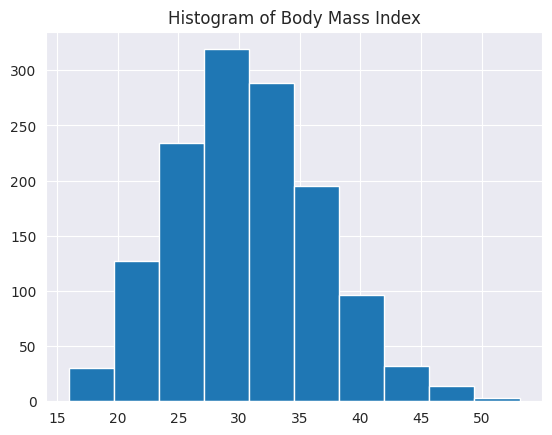

In [146]:
#Examine the distribution of Bmi
plt.hist(dataset['bmi'])
plt.title("Histogram of Body Mass Index")
#The BMI value in the dataset is usually around 30. Looking at the histogram, it is seen that the BMI value has a normal distribution.

<Axes: xlabel='charges', ylabel='smoker'>

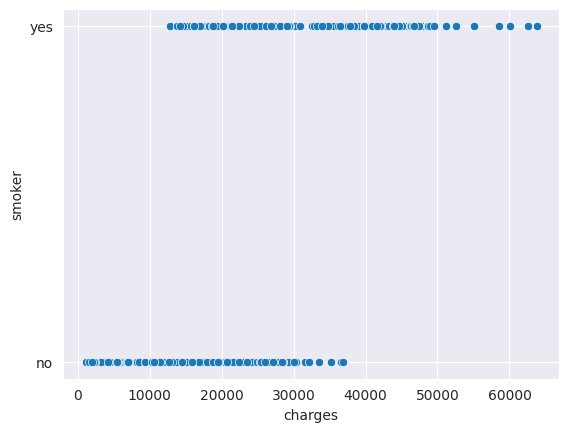

In [147]:
#Examine the relationship between “smoker” and “charges”
sns.scatterplot(x='charges', y='smoker', data=dataset)
#According to the scatter plot, people with higher charges are usually smokers.

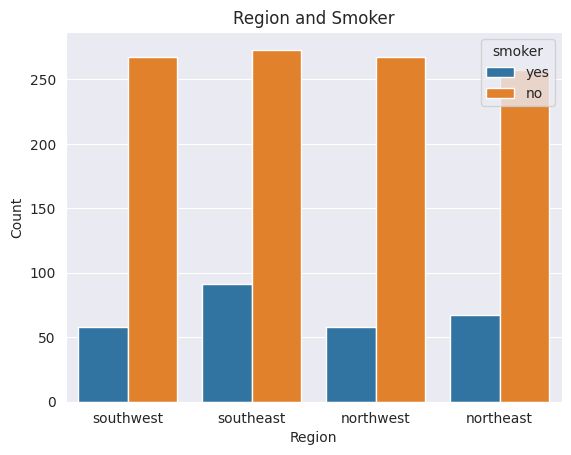

In [148]:
#Examine the relationship between “smoker” and “region”.
sns.countplot(data=dataset, x='region', hue='smoker')
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Region and Smoker")
plt.show()
#According to the graph, the number of non-smokers are more than smokers in all regions.

<Axes: xlabel='region', ylabel='smoker'>

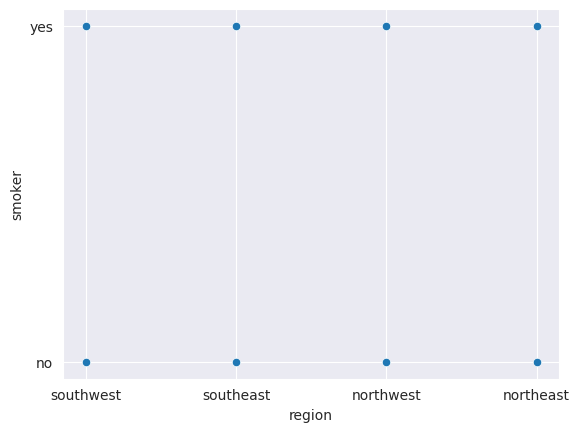

In [149]:
#Examine the relationship between “smoker” and “region”.
sns.scatterplot(x='region', y='smoker', data=dataset)
#According to the scatter plot, there are both smokers and non-smokers in all areas.

<Axes: xlabel='bmi', ylabel='sex'>

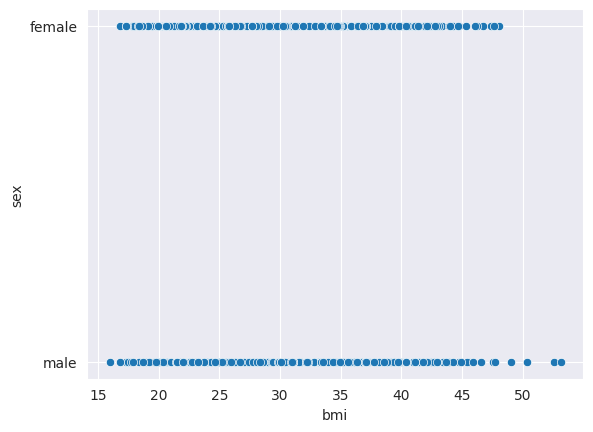

In [150]:
#Examine the relationship between “bmi” and “sex”.

sns.scatterplot(x='bmi', y='sex', data=dataset)
#According to the scatter graph, men tend to have a higher BMI.

<Axes: xlabel='age', ylabel='bmi'>

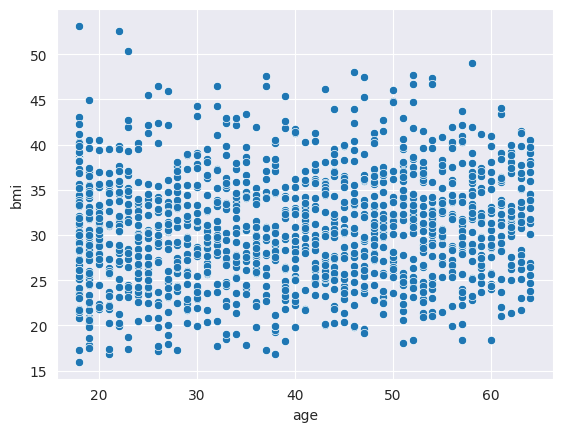

In [151]:
#Examine the relationship between “age” and “bmi”.
sns.scatterplot(x='age', y='bmi', data=dataset)
#According to the scatter graph, men tend to have a higher BMI. The bmi value is usually between 20-40 at all ages.

<Axes: xlabel='children', ylabel='bmi'>

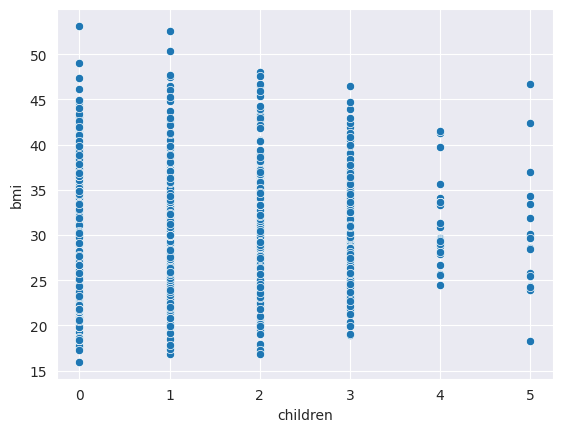

In [152]:
#Examine the relationship between “bmi” and “children”.
sns.scatterplot(x='children', y='bmi', data=dataset)
#Individuals with a medium BMI usually have a number of children ranging from 0 to 5. However, individuals with low and high BMI generally have 0-3 children.

Text(0.5, 1.0, 'Box Plot of Body Mass Index')

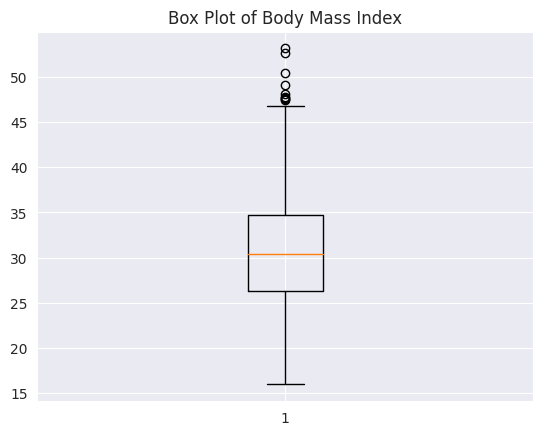

In [153]:
#Is there an outlier in the "bmi" variable?
plt.boxplot(dataset['bmi'])
plt.title("Box Plot of Body Mass Index")
# Yes, the values above 45 are outliners.

<Axes: xlabel='bmi', ylabel='charges'>

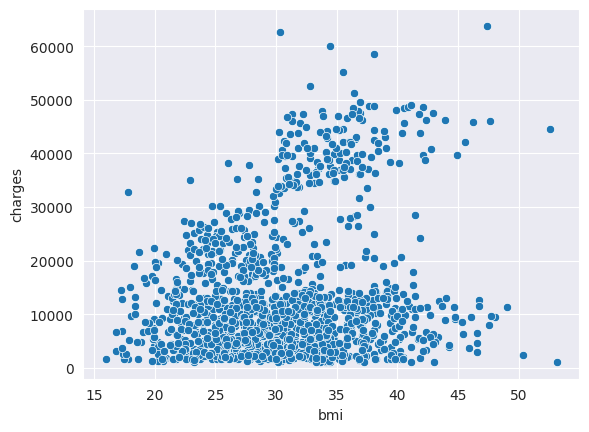

In [154]:
#Examine the relationship between “bmi” and “charges”.
sns.scatterplot(x='bmi', y='charges', data=dataset)
#Individuals with medium bmi generally have various charges, while individuals with low and high bmi generally have less charges.

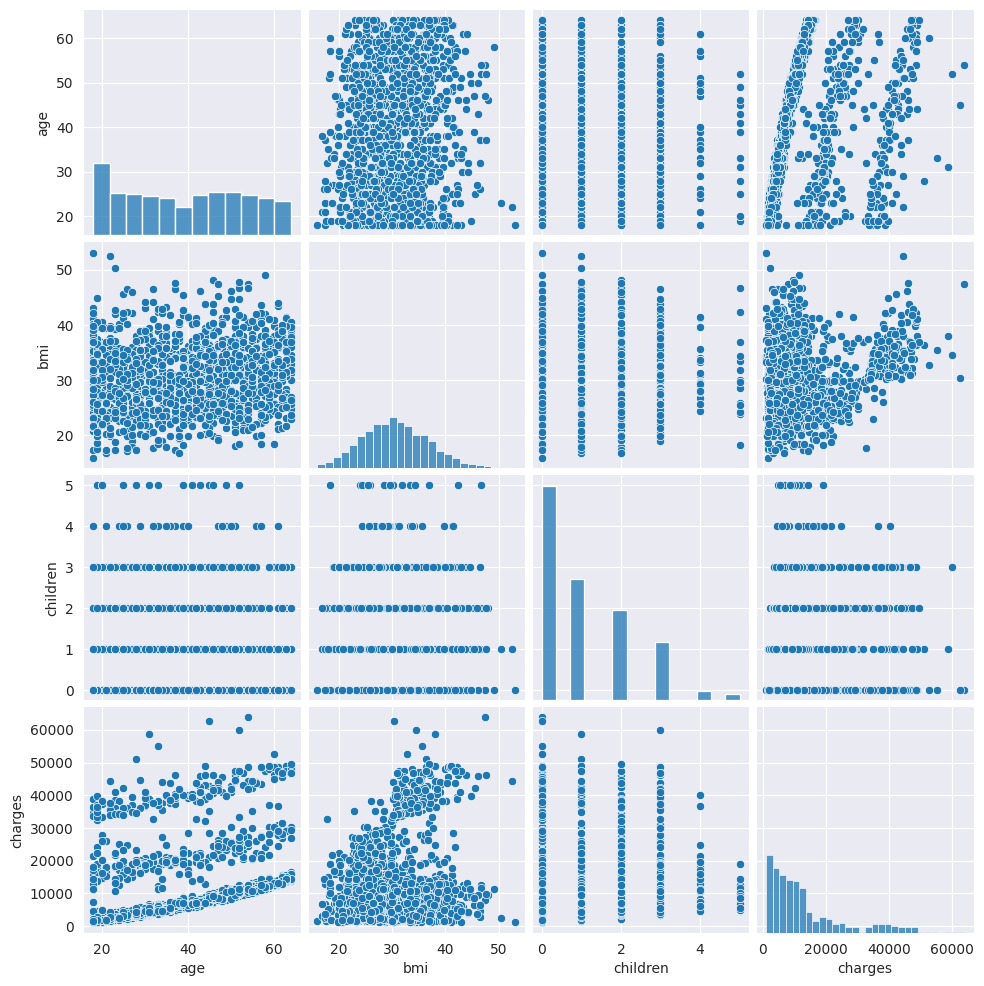

In [155]:
sns.set_style('darkgrid')
sns.pairplot(dataset);

Data Preprocessing

In [156]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset["sex"] = labelencoder.fit_transform(dataset["sex"].values)
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [157]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset["smoker"] = labelencoder.fit_transform(dataset["smoker"].values)
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [158]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dataset["region"] = labelencoder.fit_transform(dataset["region"].values)
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [159]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


<Axes: >

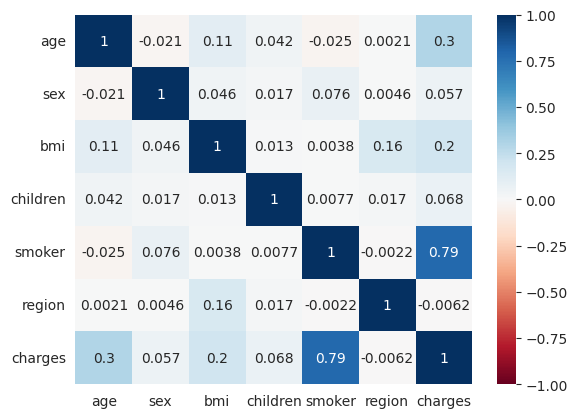

In [160]:
corr=dataset.corr()
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels= corr.columns.values, cmap='RdBu', vmin=-1, vmax=1, annot=True)

In [161]:
X = dataset.drop("charges", axis=1)
Y = dataset.loc[:,"charges"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [162]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
X_train_std=scaler1.fit_transform(X_train)
X_test_std=scaler1.transform(X_test)
X_train_std

array([[ 0.47222651, -1.0246016 , -1.75652513,  0.73433626, -0.50874702,
        -0.45611589],
       [ 0.54331294, -1.0246016 , -1.03308239, -0.91119211, -0.50874702,
        -1.35325561],
       [ 0.8987451 , -1.0246016 , -0.94368672, -0.91119211, -0.50874702,
         0.44102382],
       ...,
       [ 1.3252637 ,  0.97598911, -0.89153925, -0.91119211, -0.50874702,
        -1.35325561],
       [-0.16755139, -1.0246016 ,  2.82086429,  0.73433626,  1.96561348,
         1.33816354],
       [ 1.1120044 ,  0.97598911, -0.10932713, -0.91119211, -0.50874702,
         1.33816354]])

Model Selection AND Hyper-parameter Optimization

In [163]:
from sklearn.metrics import r2_score
lrmodel = LinearRegression()
lrmodel.fit(X_train_std,Y_train)
ypredtrain1=lrmodel.predict(X_train_std)
ypredtest1=lrmodel.predict(X_test_std)
print(r2_score(Y_train,ypredtrain1))
print(r2_score(Y_test,ypredtest1))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())


0.7417049283233981
0.7833463107364536
0.7472559473580954


In [164]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(X_train_std,Y_train)
ypredtrain2=rfmodel.predict(X_train_std)
ypredtest2=rfmodel.predict(X_test_std)
print(r2_score(Y_train,ypredtrain2))
print(r2_score(Y_test,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

#Optimization
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train_std,Y_train)
print(grid.best_params_)

rfmodel=RandomForestRegressor(random_state=42,n_estimators=40)
rfmodel.fit(X_train_std,Y_train)
ypredtrain2=rfmodel.predict(X_train_std)
ypredtest2=rfmodel.predict(X_test_std)
print(r2_score(Y_train,ypredtrain2))
print(r2_score(Y_test,ypredtest2))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())


0.9744654329628125
0.8653861739369313
0.835954346067321
{'n_estimators': 40}
0.971926927356752
0.8643283746871065
0.8333918300740656


In [165]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(X_train_std,Y_train)
ypredtrain3=gbmodel.predict(X_train_std)
ypredtest3=gbmodel.predict(X_test_std)
print(r2_score(Y_train,ypredtrain3))
print(r2_score(Y_test,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

0.8980459663933704
0.8780529462228404
0.853738708595424


In [166]:
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train_std,Y_train)
print(grid.best_params_)


{'learning_rate': 0.19, 'n_estimators': 19}


In [175]:
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.19)
gbmodel.fit(X_train_std,Y_train)
ypredtrain3=gbmodel.predict(X_train_std)
ypredtest3=gbmodel.predict(X_test_std)
print(r2_score(Y_train,ypredtrain3))
print(r2_score(Y_test,ypredtest3))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())


0.8758879480896801
0.8782687457709175
0.8602777173588821


In [168]:
xgmodel=XGBRegressor()
xgmodel.fit(X_train_std,Y_train)
ypredtrain4=xgmodel.predict(X_train_std)
ypredtest4=xgmodel.predict(X_test_std)
print(r2_score(Y_train,ypredtrain4))
print(r2_score(Y_test,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

0.9923791497559626
0.8546465198890332
0.8108156945312966


In [169]:
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train_std,Y_train)
print(grid.best_params_)


{'gamma': 0, 'max_depth': 3, 'n_estimators': 15}


In [170]:
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(X_train_std,Y_train)
ypredtrain4=xgmodel.predict(X_train_std)
ypredtest4=xgmodel.predict(X_test_std)
print(r2_score(Y_train,ypredtrain4))
print(r2_score(Y_test,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

0.8783701554506844
0.8805236904798931
0.8602620961074574


In [171]:
#According to the metrics, the best model is XGBoost.

Model Evaluation

In [172]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt

In [173]:
rmse = sqrt(mean_squared_error(Y_test, ypredtest4))
rmse

4306.802235570505

In [174]:
comparison = pd.DataFrame({"Actual Values": Y_test,"Predictions": ypredtest4})
comparison.head()

,Actual Values,Predictions
764,9095.06825,10642.750000
887,5272.17580,5864.986328
890,29330.98315,26270.865234
1293,9301.89355,10161.401367
259,33750.29180,34303.113281
